In [1]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import textwrap
import numpy as np

df = pd.read_csv('https://storage.googleapis.com/hk4417_dse6000_hoassignment/Covid_Data.csv', encoding="ISO-8859-1")

In [2]:
#TODO

#20 correlation statements

# 1
def vaccination_correlation(df):
  y = df[df['indicator'] == 'Vac_done']
  x = y.copy()
  x['percentage_vaccinated'] = (x['sample_subset']/x['sample_total']) *100 
  percentage = x['percentage_vaccinated'].astype('category').cat.codes
  development = x['urban_rural'].astype('category').cat.codes

  vax_correlation = percentage.corr(development)
  return vax_correlation


In [ ]:
# 2
income = df[['income_group', 'sample_total']].drop_duplicates(subset=['income_group', 'sample_total'], keep='first')
income = income.groupby('income_group').agg({'sample_total': 'count'})

In [ ]:
# 3 
industry = df[['industry', 'sample_total']].drop_duplicates(subset=['industry', 'sample_total'], keep='first')
industry = industry.groupby('industry').agg({'sample_total': 'count'})

In [ ]:
# 4 
coping = df[df['indicator_topic'] == 'Coping']
coping['count_column'] = 1
coping_count = coping.groupby(['indicator_display', 'country']).agg({'count_column':'count'})

In [ ]:
# 5
copi_sold = (df['indicator'] == 'Copi_sold') & (df['industry'] == 'All') & (df['wave'] == 'WAVE1')
df.loc[copi_sold, ['country', 'indicator_display', 'urban_rural', 'sample_subset', 'sample_total', 'income_group']]

In [ ]:
# 6
copi_sold2 = (df['indicator'] == 'Copi_sold') & (df['industry'] == 'All') & (df['wave'] == 'WAVE2')
df.loc[copi_sold2, ['country', 'indicator_display', 'urban_rural', 'sample_subset', 'sample_total', 'income_group']]

In [ ]:
# 7 
# covid_project_Peru_vaccination = df[df.indicator_topic.isin(['Vaccination'])]
# covid_project_Peru_vaccination = df[df['indicator'].str.contains('Vac_concer')]
# covid_project_Peru_vaccination2 = covid_project_Peru_vaccination.copy()
# covid_project_Peru_vaccination2.drop(df.index[df['indicator'] == 'Vac_concern_9'], inplace=True)
# covid_project_Peru_vaccination2["indicator_display"] = df["indicator_display"].str.replace("Not wanting or unsure about vaccination","")
# covid_project_Peru_vaccination2[['income_group', 'month', 'year', 'indicator_topic', 'GDP_pc']]


In [ ]:
# 8
FS_day = (df['indicator'] == 'FS_day') & (df['industry'] == 'All') & (df['wave'] == 'WAVE1')
df.loc[FS_day, ['country', 'indicator_display', 'urban_rural', 'sample_subset', 'sample_total', 'income_group']]

In [ ]:
# 9
covid_project_Peru_education = df[df.indicator.isin(['Demo_educ1', 'Demo_educ2', 'Demo_educ3', 'Demo_educ4']) \
                                                  & df.wave.isin(['WAVE1'])]


In [ ]:
# 10
FS_day3 = (df['indicator'] == 'FS_day') & (df['industry'] == 'All') & (df['wave'] == 'WAVE3')
df.loc[FS_day3, ['country', 'indicator_display', 'urban_rural', 'sample_subset', 'sample_total', 'income_group']]

In [ ]:
# 11
Safe_anysource = (df['indicator'] == 'Safe_anysource') & (df['industry'] == 'All')
df.loc[Safe_anysource, ['country', 'indicator_display', 'urban_rural', 'sample_subset', 'sample_total', 'income_group']]

In [ ]:
# 12
Educ_mobi = (df['indicator'] == 'Educ_mobi') & (df['industry'] == 'All') & (df['wave'] == 'WAVE1')
df.loc[Educ_mobi, ['country', 'indicator_display', 'urban_rural', 'sample_subset', 'sample_total', 'income_group']]

In [ ]:
# 13
Educ_mobi2 = (df['indicator'] == 'Educ_mobi') & (df['industry'] == 'All') & (df['wave'] == 'WAVE2')
df.loc[Educ_mobi2, ['country', 'indicator_display', 'urban_rural', 'sample_subset', 'sample_total', 'income_group']]

In [ ]:
# 14
Educ_mobi3 = (df['indicator'] == 'Educ_mobi') & (df['industry'] == 'All') & (df['wave'] == 'WAVE3')
df.loc[Educ_mobi3, ['country', 'indicator_display', 'urban_rural', 'sample_subset', 'sample_total', 'income_group']]

In [ ]:
#15
Heal_reason1 = (df['indicator'] == 'Heal_reason1') & (df['industry'] == 'All') & (df['wave'] == 'WAVE1')
df.loc[Heal_reason1, ['country', 'indicator_display', 'urban_rural', 'sample_subset', 'sample_total', 'income_group']]

In [ ]:
# 16
vax_income = df[df['indicator'] == 'Vac_done']
y = vax_income.copy()
y['percentage_vaccinated'] = (y['sample_subset']/y['sample_total'])
x = y[['income_group', 'percentage_vaccinated']].groupby('income_group').agg({'percentage_vaccinated':'mean'}).style.format("{:.1%}")

In [ ]:
# 17
frame = pd.DataFrame()
for i in range(1, 10):
  x = df[df['indicator'] == f'Vac_concern_{i}']
  frame = frame.append(x)
pd.pivot_table(frame, values='indicator', index=['indicator_display'],
                    columns=['income_group'], aggfunc={'income_group' : 'count'})

Plots and charts

In [ ]:
# 1
def region_graph(df):
  frame_count = df[['region_code', 'region']]\
                .groupby('region_code')\
                .agg({'region' : 'count'})\
                .reset_index()
  frame_count.rename(columns={"region": "region_count"})
  frame_plot = df[['region', 'region_code']]
  frame_plot_graph = frame_count.join(frame_plot.set_index('region_code'),\
                                      on='region_code', how='inner', lsuffix='_count')\
                                      .sort_values(by='region_count', ascending=False)
  return frame_plot_graph

frame_plot = region_graph(df)

%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='region_code', hue='region', data=frame_plot)
sns.move_legend(ax, "upper right")
plt.show()

Text(0.5, 0.98, 'Exploring Conflict Zones, Financial Access and Medical Assistance within Income Groups')

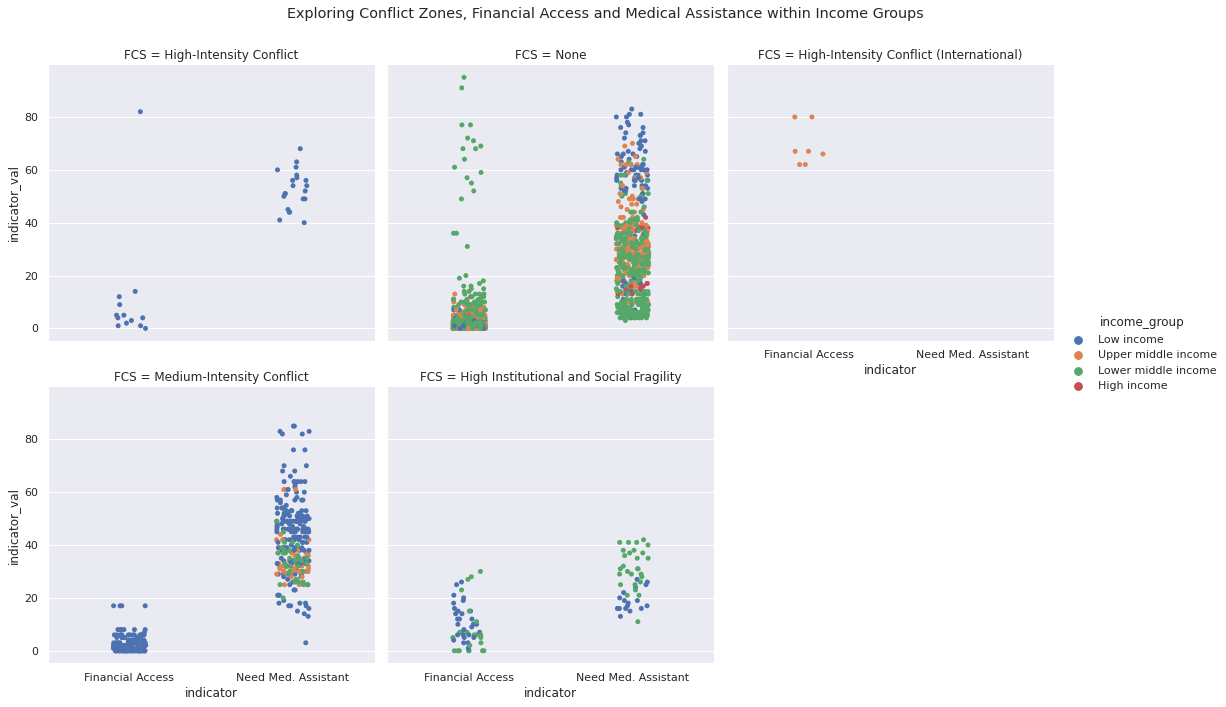

In [52]:
#2
#TODO Find another chart to do this one is too much work on dash
df['FCS'] = df['FCS'].fillna('None')
df['FCS'].unique()
cat_df = df[['indicator', 'indicator_val', 'FCS', 'income_group']]
cat_df = cat_df[(cat_df['indicator'] == 'Heal_need') | (cat_df['indicator'] == 'Fina_access')]
cat_df['indicator'] = cat_df['indicator'].apply(lambda x: 'Need Med. Assistant' if x == 'Heal_need' else 'Financial Access')

ax = sns.catplot(data=cat_df, x='indicator', y='indicator_val', hue='income_group', col='FCS', col_wrap=3)
ax.fig.subplots_adjust(top=0.9) 
ax.fig.suptitle('Exploring Conflict Zones, Financial Access and Medical Assistance within Income Groups')

In [ ]:
#3
vac_df = df[['indicator_val', 'indicator', 'income_group']]
vac_df = vac_df[(vac_df['indicator'] == 'Vac_done') | (vac_df['indicator'] == 'Know_any')]
vac_df['indicator'] = vac_df['indicator'].apply(lambda x: 'Known Gov. Intv.' if x == 'Know_any' else 'Vaccinated')

ax = sns.violinplot(data=vac_df, x='income_group', y='indicator_val', hue='indicator', split=True)
ax.set(title='% of Respondents Per Income Group Vaccinated and Know of any Gov. Intervention', xlabel='Income Group', ylabel='% of Respondents')

In [ ]:
#4
area_df = df[df['indicator'].str.contains('Demo_educ')]
area_pt = pd.pivot_table(area_df, values=['indicator_val'], index=['urban_rural', 'indicator'], aggfunc=np.mean).reset_index()
educ_mapper = {'Demo_educ1': 'No Education',
               'Demo_educ2': 'Any Primary',
               'Demo_educ3': 'Any Secondary',
               'Demo_educ4': 'Any Post Secondary'}
area_pt['indicator'] = area_pt['indicator'].apply(lambda x: educ_mapper[x])

sns.set(rc={'figure.figsize':(15,8)})
ax = sns.barplot(x='urban_rural', y='indicator_val', hue='indicator', data=area_pt)
ax.set(title='Percentage of Respondents per Education Level in Differing Areas', xlabel='Area of Country', ylabel='% of Respondents')
ax.legend(loc='upper left')
plt.show()


In [ ]:
#5
gdp_df = df[['indicator', 'indicator_val', 'GDP_pc']]
gdp_df = gdp_df.rename(columns={'indicator_val': 'Preventative Measure', 'GDP_pc': 'GDP / Capita'})
gdp_df = gdp_df[gdp_df['indicator'] == 'Prev_AP_other']

sns.set(rc={'figure.figsize':(15,8)})
ax = sns.displot(x='GDP / Capita', y='Preventative Measure', data=gdp_df, bins=10)
ax.set(title='Distribution of Preventative Measures per GDP / Capita')

Exploring queries

In [ ]:
#1
bad_value = ['Not reported']
reporting = df[~df["urban_rural"].isin(bad_value)]
pd.pivot_table(reporting, values='GDP_pc', index=['FCS'],
                    columns=['income_group'], aggfunc={'income_group' : 'count'})\
                    .sort_values(['FCS'], ascending=[True])

In [ ]:
#2
explore = df.groupby('country').agg({'GDP_pc': 'mean'})
explore.sort_values(['GDP_pc'], ascending=[False])
explore.reset_index()

In [ ]:
#TODO
# You should have a final conclusion, highlighting the main insights that you were able to derive from your analysis
